In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings("ignore")



/usr/local/lib/python3.12/dist-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
#loading the data set

file_paath = '/home/ichigo/Desktop/Medical diagnosis uisng AI/Diseases_dataset/Liver_disease_data.csv'
df = pd.read_csv(file_paath)

In [4]:
#Diplay basic info and check for missing values
df.info()
print("\nMissing values :/n",df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1700 non-null   int64  
 1   Gender              1700 non-null   int64  
 2   BMI                 1700 non-null   float64
 3   AlcoholConsumption  1700 non-null   float64
 4   Smoking             1700 non-null   int64  
 5   GeneticRisk         1700 non-null   int64  
 6   PhysicalActivity    1700 non-null   float64
 7   Diabetes            1700 non-null   int64  
 8   Hypertension        1700 non-null   int64  
 9   LiverFunctionTest   1700 non-null   float64
 10  Diagnosis           1700 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 146.2 KB

Missing values :/n Age                   0
Gender                0
BMI                   0
AlcoholConsumption    0
Smoking               0
GeneticRisk           0
PhysicalActivity      0
Diabetes        

In [5]:
#summary statistics
print("\nSummary Statistics:\n",df.describe())


Summary Statistics:
                Age       Gender          BMI  AlcoholConsumption      Smoking  \
count  1700.000000  1700.000000  1700.000000         1700.000000  1700.000000   
mean     50.394118     0.504118    27.699801            9.832309     0.291765   
std      17.641915     0.500130     7.210400            5.757472     0.454708   
min      20.000000     0.000000    15.004710            0.003731     0.000000   
25%      35.000000     0.000000    21.455414            4.841811     0.000000   
50%      51.000000     1.000000    27.925367            9.828195     0.000000   
75%      66.000000     1.000000    33.957668           14.871671     1.000000   
max      80.000000     1.000000    39.992845           19.952456     1.000000   

       GeneticRisk  PhysicalActivity     Diabetes  Hypertension  \
count  1700.000000       1700.000000  1700.000000   1700.000000   
mean      0.521765          5.000993     0.142353      0.154706   
std       0.666262          2.847074     0.3495

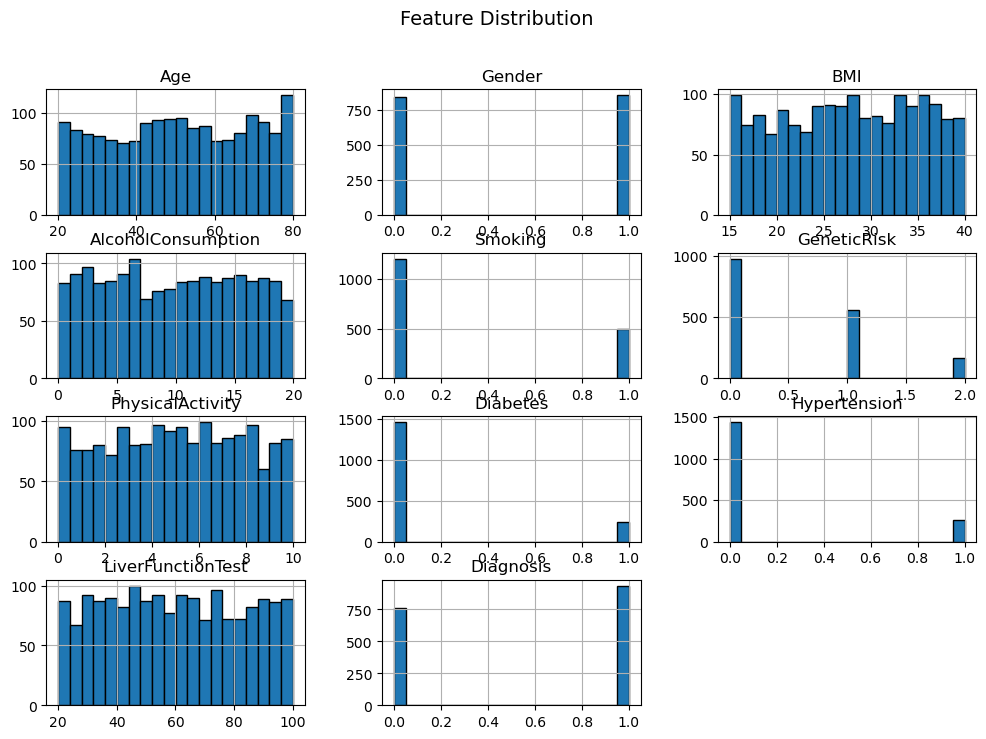

In [71]:
#visualizing Distribution of numerical features 
df.hist(figsize = (12,8),bins = 20 ,edgecolor ='black')
plt.suptitle('Feature Distribution',fontsize = 14)
plt.show()

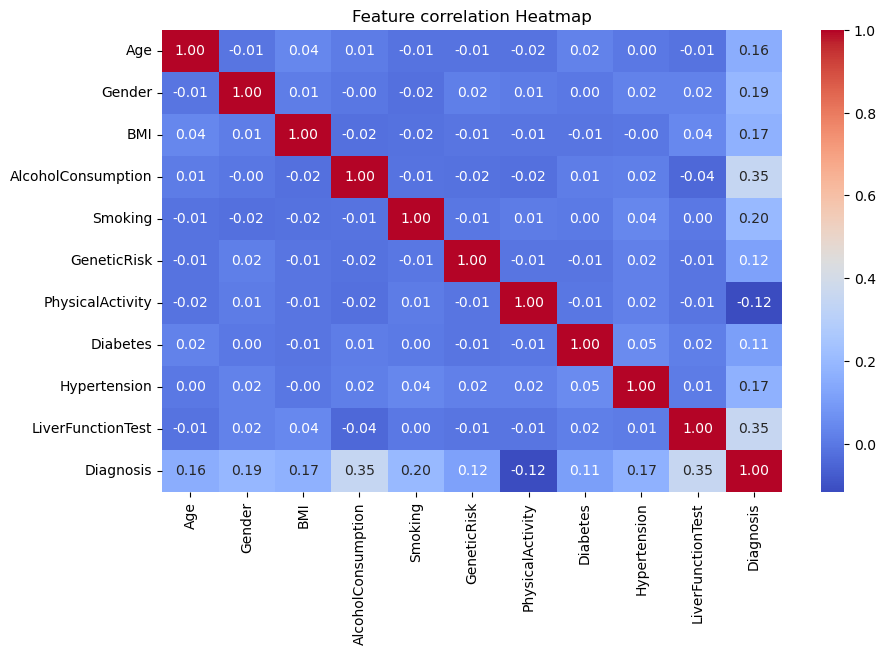

In [6]:
#correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt = ".2f")
plt.title('Feature correlation Heatmap')
plt.show()


In [7]:

# Separate features and target
X = df.drop("Diagnosis", axis=1)
y = df["Diagnosis"]


In [8]:
# Scale numerical features
scaler = StandardScaler()
numerical_cols = ["Age", "BMI", "AlcoholConsumption", "PhysicalActivity", "LiverFunctionTest"]
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


In [9]:
# 3. Model Selection
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

In [11]:
# Evaluate models using cross-validation
best_model = None
best_accuracy = 0
best_model_name = ""

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    mean_accuracy = scores.mean()
    print(f"{name} Accuracy: {mean_accuracy:.4f} (+/- {scores.std() * 2:.4f})")
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_model = model
        best_model_name = name

print(f"\nBest Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")


Logistic Regression Accuracy: 0.8279 (+/- 0.0355)
Random Forest Accuracy: 0.8831 (+/- 0.0230)
XGBoost Accuracy: 0.8904 (+/- 0.0545)
SVM Accuracy: 0.8551 (+/- 0.0396)

Best Model: XGBoost with Accuracy: 0.8904


In [12]:
# Train the best model on the full training set
best_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [13]:
# Test accuracy
y_pred = best_model.predict(X_test)
test_accuracy = (y_pred == y_test).mean()
print(f"Test Accuracy of Best Model: {test_accuracy:.4f}")

Test Accuracy of Best Model: 0.8912


In [ ]:
# 4. Feature Reduction (if Random Forest or XGBoost)
if best_model_name in ["Random Forest", "XGBoost"]:
    # Get feature importance
    importance = pd.DataFrame({
        "Feature": X.columns,
        "Importance": best_model.feature_importances_
    }).sort_values("Importance", ascending=False)

    print("\nFeature Importance:\n", importance)

    # Select top 5 features
    top_features = importance["Feature"].head(5).tolist()
    print(f"Top 5 Features: {top_features}")

    # Retrain with reduced features
    X_reduced = X[top_features]
    X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
    best_model.fit(X_train_red, y_train_red)
    y_pred_red = best_model.predict(X_test_red)
    reduced_accuracy = (y_pred_red == y_test_red).mean()
    print(f"Accuracy with Reduced Features: {reduced_accuracy:.4f}")

    # Save the model with reduced features
    with open("/home/ichigo/Desktop/Medical diagnosis uisng AI/Models/Liver_diseases_model.pkl", "wb") as file:
        pickle.dump(best_model, file)

    # Save the scaler for the reduced features
    with open("/home/ichigo/Desktop/Medical diagnosis uisng AI/Models/liver_scaler.pkl", "wb") as file:
        pickle.dump(scaler, file)
else:
    top_features = X.columns.tolist()  # Use all features if not RF/XGBoost
    reduced_accuracy = test_accuracy
    print("Using all features as best model is not RF/XGBoost")
    # Save the model with all features
    with open("/home/ichigo/Desktop/Medical diagnosis uisng AI/Models/Liver_diseases_model.pkl", "wb") as file:
        pickle.dump(best_model, file)
    with open("/home/ichigo/Desktop/Medical diagnosis uisng AI/Models/liver_scaler.pkl", "wb") as file:
        pickle.dump(scaler, file)


Feature Importance:
               Feature  Importance
4             Smoking    0.172660
8        Hypertension    0.145943
5         GeneticRisk    0.117951
3  AlcoholConsumption    0.109961
1              Gender    0.108261
9   LiverFunctionTest    0.095365
7            Diabetes    0.083411
0                 Age    0.067432
2                 BMI    0.049954
6    PhysicalActivity    0.049063
